In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

cards_type = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']
cards_scores = [1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  10, 10, 10]
num_cards_type = 13

def calc_total_score(cards):
    total_score = 0
    has_ace = False
    for card in cards:
        total_score += cards_scores[card]
        if card == 0:
            has_ace = True
    if has_ace and total_score <= 11:
        return total_score + 10, True
    else:
        return total_score, False


def blackjack_episode():
    states = np.zeros((22,3),dtype=int)#player score, dealer clear card, player has ace
    actions = np.zeros(22,dtype=int)
    rewards = np.zeros(22,dtype=float)

    dealer_cards = [random.choice(range(num_cards_type)), random.choice(range(num_cards_type))]
    player_cards = [random.choice(range(num_cards_type)), random.choice(range(num_cards_type))]
    dealer_score,_ = calc_total_score(dealer_cards)
    player_score, usable_ace = calc_total_score(player_cards)
    showing_card = cards_scores[dealer_cards[0]]

    states[0] = [player_score, showing_card, usable_ace]
    if player_score == 21:
        rewards[0] = 0 if dealer_score == 21 else 1
        actions[0] = 1
        return states[:1], actions[:1], rewards[:1]
    
    #first_action = random.choice([0,1]) 
    step = 0
    #while step == 0 and first_action == 0 or step != 0 and player_score < 20:
    while player_score < 21:
        if random.random() < 0.5:
            break
        step += 1
        player_cards.append(random.choice(range(num_cards_type)))
        player_score, usable_ace = calc_total_score(player_cards)
        states[step] = [player_score, showing_card, usable_ace]

    actions[step] = 1
    if player_score > 21:
        rewards[step] = -1
        return states[:step+1],actions[:step+1],rewards[:step+1]
    
    while dealer_score < 17:
        dealer_cards.append(random.choice(range(num_cards_type)))
        dealer_score,_ = calc_total_score(dealer_cards)
    
    if dealer_score > 21:
        rewards[step] = 1
    else:
        if player_score < dealer_score:
            rewards[step] = -1
        elif player_score > dealer_score:
            rewards[step] = 1
        else:
            rewards[step] = 0
    return states[:step+1],actions[:step+1],rewards[:step+1]


def monte_carlo_es(num_episodes):
    values = np.zeros((2,29,10,2),dtype=float)
    counts = np.zeros((2,29,10,2),dtype=int)
    for n in range(num_episodes):
        accesses = np.zeros((2,29,10,2),dtype=bool)
        states, actions, rewards = blackjack_episode()
        g = 0.0
        len = rewards.size
        for t in range(len-1,-1,-1):
            g += rewards[t]
            player_score, showing_card, usable_ace = states[t]
            action = actions[t]
            index = (usable_ace, player_score-2, showing_card-1, action)
            if not accesses[index]:
                accesses[index] = True
                counts[index] += 1
                values[index] += (g - values[index])/counts[index]
    policy = np.zeros((2,29,10),dtype=int)
    policy[:,:,:] = values[:,:,:].argmax(axis=3)
    return policy, values



def show_policy(policy):
    plt.rcParams['figure.figsize']=(5, 5)
    fig, ax  = plt.subplots()
    ax.imshow(policy, origin='lower')
    ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,10))
    ax.set_xticklabels(range(1,11))
    ax.set_yticklabels(range(12,22))
    for y in range(10):
        for x in range(10):
            text = ax.text(x, y, f"{policy[y, x]}", ha="center", va="center", color=(0,0,0))

def show_values(values):
    plt.rcParams['figure.figsize']=(8, 8)
    fig, ax  = plt.subplots()
    ax.imshow(values, origin='lower')
    ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,10))
    ax.set_xticklabels(range(1,11))
    ax.set_yticklabels(range(12,22))
    for y in range(10):
        for x in range(10):
            text = ax.text(x, y, f"{values[y, x]:.4f}", ha="center", va="center", color=(0,0,0))

def show_values_3d(values):
    plt.rcParams['figure.figsize']=(5, 5)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    y = np.linspace(12,21,10)
    x = np.linspace(1,10,10)
    X, Y = np.meshgrid(x, y)
    ax.plot_wireframe(X, Y, values, color='black')
    ax.view_init(20,-50)


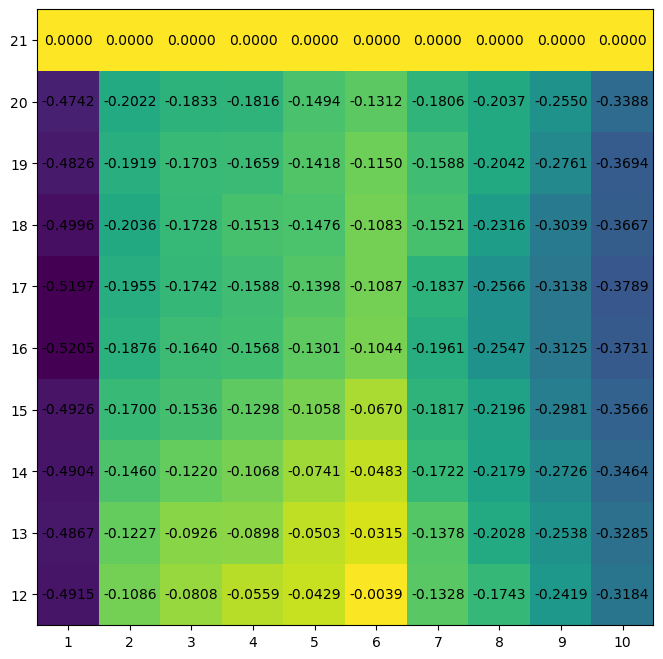

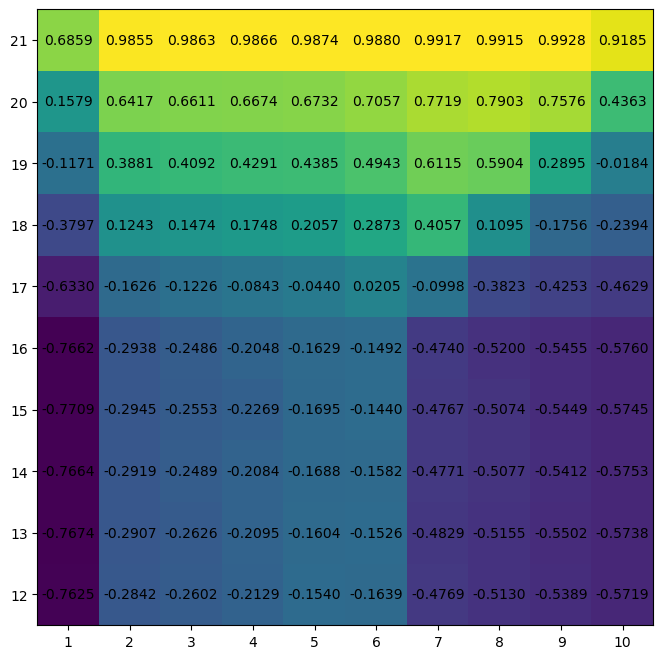

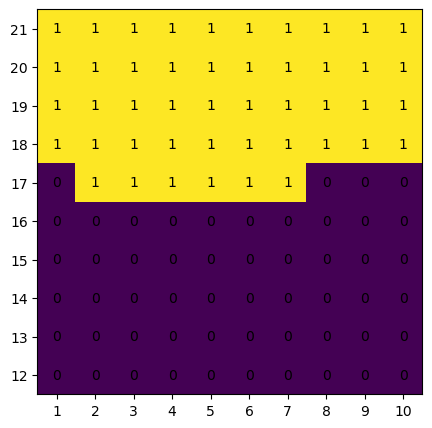

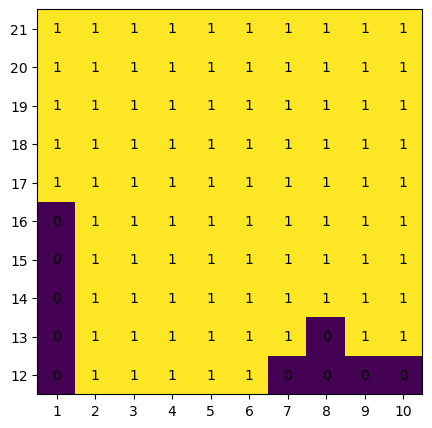

In [15]:
from mpl_toolkits import mplot3d

policy, values = monte_carlo_es(5000000)
show_values(values[1,10:20,:,0])
show_values(values[1,10:20,:,1])

show_policy(policy[1,10:20,:])
show_policy(policy[0,10:20,:])
#show_values_3d(values[1,10:20,:,0])
#show_values_3d(values[0,10:20,:,1])
